In [47]:
# importing labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_auc_score,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,auc)
import seaborn as sns

In [48]:
# loading the dataset
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\labeled_data.csv")
x=data.iloc[:,:2100].values
y=data.iloc[:,2100].values

<function matplotlib.pyplot.show(close=None, block=None)>

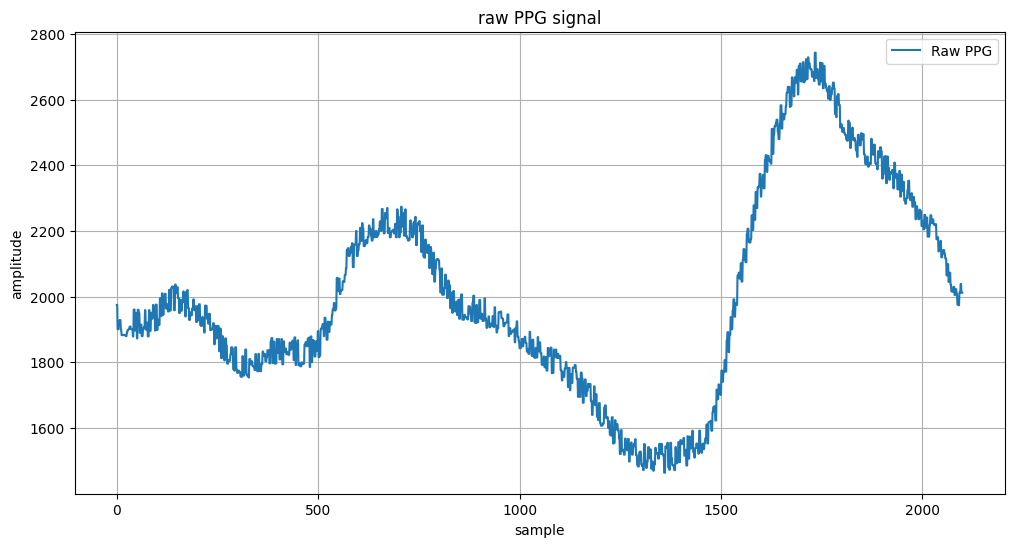

In [49]:
# plotting the raw ppg signal

plt.figure(figsize=(12,6))
plt.plot(x[0],label='Raw PPG')
plt.title('raw PPG signal')
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.legend()    
plt.grid()
plt.show

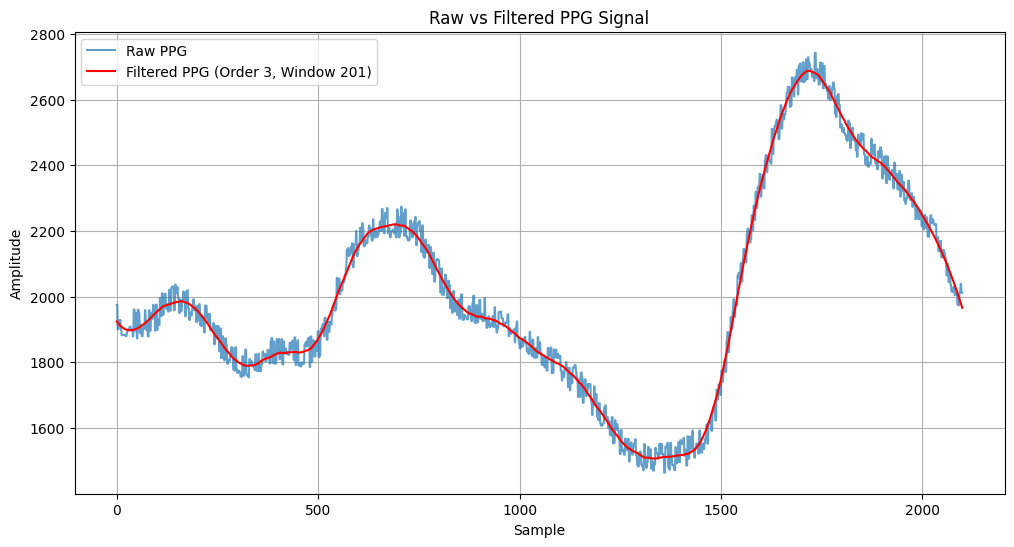

In [50]:
# Applying Savitzky-Golay filter to smooth the PPG signal
filterd_ppg= savgol_filter(x[0], window_length=201, polyorder=3)

# plto both raw and filtered ppg signal
plt.figure(figsize=(12,6))
plt.plot(x[0], label='Raw PPG', alpha=0.7)
plt.plot(filterd_ppg, label='Filtered PPG (Order 3, Window 201)', color='red')
plt.title('Raw vs Filtered PPG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [51]:
def extract_features(signal):
    features = []
    # 1. mean
    features.append(np.mean(signal))
    # 2 . standard deviation
    features.append(np.std(signal)) 
    # 3. varience
    features.append(np.var(signal))
    # 4.Skewness
    features.append(pd.Series(signal).skew())
    # 5. Kurtosis
    features.append(pd.Series(signal).kurtosis())
    # 6. RMS
    features.append(np.sqrt(np.mean(signal**2)))
    # 7. peak-to-peak amplitude
    features.append(np.max(signal) - np.min(signal))
    # 8. Zero-crossing rate
    features.append(((signal[:-1] * signal[1:]) < 0).sum())
    # 9.Mean Absolute Deviation (MAD)
    features.append(np.mean(np.abs(signal - np.mean(signal))))
    # 10. Energy
    features.append(np.sum(signal**2))
    return features

In [52]:
# Extract features for all signals
X_features=np.array([extract_features(x)for x in x])
feature_names=['Mean','Std','Variance','Skewness','Kurtosis','RMS','Peack-to-Peak','Zero-Crossing','MAD','Energy']



In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y,test_size=0.3,random_state=42)

In [54]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_curve, auc

# Train classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_prov = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prov)
roc_auc = auc(fpr, tpr)

print(f"AUC Score: {roc_auc:.2f}")


AUC Score: 0.80


ROC AUC: 0.7982
Precision: 0.5952
Recall: 0.7812
F1 Score: 0.6757

Confusion Matrix:
[[18 17]
 [ 7 25]]


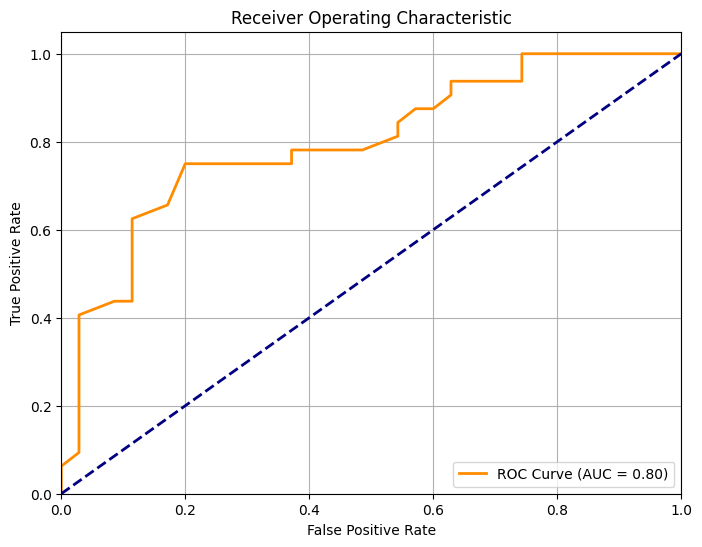

In [55]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
# precision, recall, f1 score
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

# print metrics
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()
